<a href="https://www.kaggle.com/code/huseyincosgun/new-york-city-airbnb-analysis?scriptVersionId=139588404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **NYC Airbnb Data Analysis**

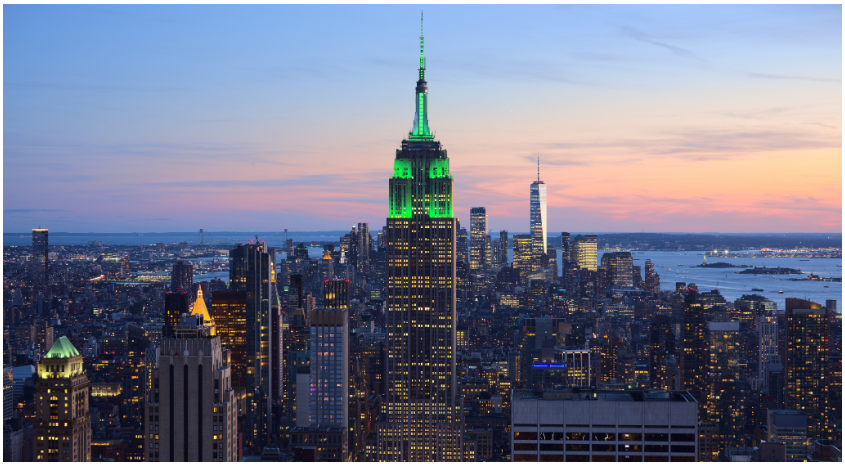

**Let's work with different types of file formats by learning about the New York City Airbnb marketplace. And let's start acquiring basic data preprocessing skills.**

### *What will we learn?*

> 1. Importing the Data
> 2. Cleaning the price column
> 3. Calculating average price
> 4. Comparing costs to the private rental market
> 5. Cleaning the room type column
> 6. What timeframe are we working with?
> 7. Joining the DataFrames.
> 8. Analyzing listing prices by NYC borough
> 9. Price range by borough
 

### *Let's get to know data sets*

New York City is the most populous city in the United States and one of the most populated metropolitan areas in the world. Accordingly, we will work on 2019 Airbnb listings that people have used for their accommodation needs.In this notebook, we will be working with different types of files containing NYC Airbnb market information, these are .csv and .xlsx.

#### *airbnb_price.csv*

**listing_id:** The unique id number of listing

**price:** Nightly accommodation fee in dollars

**nbhood_full:** The borough and neighbourhood where the listing is located

#### *airbnb_last_review.csv*

**listing_id:** The unique id number of listing

**host_name:** Name of the host

**last_review:** Last review date

#### *airbnb_room_type.xlsx*

**listing_id:** The unique id number of listing

**description:** Apartment description

**room_type:** Room type

The main purpose is to get meaningful results by recognizing the data. In the process, it is to transform the irregular and unprocessed data into a correct and interpretable data.

* What is the average price, per night, of an Airbnb listing in NYC?
* How does the average price of an Airbnb listing, per month, compare to the private rental market?
* How many adverts are for private rooms?
* How do Airbnb listing prices compare across the five NYC boroughs?

ref: https://projects.datacamp.com/projects/1354

## 1 - Importing the Data


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/new-york-city-airbnb-market/airbnb_last_review.csv
/kaggle/input/new-york-city-airbnb-market/airbnb_price.csv
/kaggle/input/new-york-city-airbnb-market/airbnb_room_type.xlsx


In [2]:
review_address = "/kaggle/input/new-york-city-airbnb-market/airbnb_last_review.csv"
price_address = "/kaggle/input/new-york-city-airbnb-market/airbnb_price.csv"
room_address = "/kaggle/input/new-york-city-airbnb-market/airbnb_room_type.xlsx"

reviews = pd.read_csv(review_address)
prices = pd.read_csv(price_address)
rooms = pd.read_excel(room_address)

In [3]:
# A function written to display dataframes together
from IPython.display import HTML

def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [4]:
side_by_side(prices.head(), rooms.head(), reviews.head())

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"
,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room


## 2 - Cleaning the price column
Now the DataFrames have been loaded, the first step is to calculate the average price per listing by room_type.

You may have noticed that the price column in the prices DataFrame currently states each value as a string with the currency (dollars) following, i.e.,

price
225 dollars
89 dollars
200 dollars
We will need to clean the column in order to calculate the average price.

In [5]:
# Remove whitespace and string characters from prices column
prices["price"] = prices["price"].str.replace(" dollars", "")

# Convert prices column to numeric datatype
prices["price"] = pd.to_numeric(prices["price"])

# Print descriptive statistics for the price column
print(prices["price"].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


### 3. Calculating average price
We can see three quarters of listings cost $175 per night or less.

However, there are some outliers including a maximum price of $7,500 per night!

Some of listings are actually showing as free. Let's remove these from the DataFrame, and calculate the average price.

In [6]:
# How many free houses ?
print(prices["price"].value_counts()[0])

7


In [7]:
# Update prices by removing all free listings from prices
prices = prices[(prices["price"] != 0)]

# Calculate the average price, avg_price
avg_price = prices["price"].mean().round(2)

# Print the average price
print("The average price per night for an Airbnb listing in NYC is ${}.".format(avg_price))

The average price per night for an Airbnb listing in NYC is $141.82.


### 4. Comparing costs to the private rental market
Now we know how much a listing costs, on average, per night, but it would be useful to have a benchmark for comparison. According to Zumper, a 1 bedroom apartment in New York City costs, on average, $3,100 per month. Let's convert the per night prices of our listings into monthly costs, so we can compare to the private market.

In [8]:
# Add a new column to the prices DataFrame, price_per_month
prices["price_per_month"] = prices["price"] * 365 / 12

# Calculate average_price_per_month
average_price_per_month = round(prices["price_per_month"].mean(), 2)

# Compare Airbnb and rental market
print("airbnb monthly costs are ${}, while in the private market you would pay {}.".format(average_price_per_month, "$3,100.00"))


airbnb monthly costs are $4313.61, while in the private market you would pay $3,100.00.


### 5. Cleaning the room type column
Unsurprisingly, using Airbnb appears to be substantially more expensive than the private rental market. We should, however, consider that these Airbnb listings include single private rooms or even rooms to share, as well as entire homes/apartments.

Let's dive deeper into the room_type column to find out the breakdown of listings by type of room. The room_type column has several variations for private room listings, specifically:

> "Private room"

> "private room"

> "PRIVATE ROOM"

We can solve this by converting all string characters to lower case (upper case would also work just fine).

In [9]:
# Convert the room_type column to lowercase
rooms["room_type"] = rooms["room_type"].str.lower()

# Update the room_type column to category data type
rooms["room_type"] = rooms["room_type"].astype("category")

# Create the variable room_frequencies
room_frequencies = rooms["room_type"].value_counts()

# Print room_frequencies
print(room_frequencies)

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64


### 6. What timeframe are we working with?
It seems there is a fairly similar sized market opportunity for both private rooms (45% of listings) and entire homes/apartments (52%) on the Airbnb platform in NYC.


Now let's turn our attention to the reviews DataFrame. The last_review column contains the date of the last review in the format of "Month Day Year" e.g., May 21 2019. We've been asked to find out the earliest and latest review dates in the DataFrame, and ensure the format allows this analysis to be easily conducted going forwards.

In [10]:
# Change the data type of the last_review column to datetime
reviews["last_review"] = pd.to_datetime(reviews["last_review"])

# Create first_reviewed, the earliest review date
first_reviewed = reviews["last_review"].dt.date.min()

# Create last_reviewed, the most recent review date
last_reviewed = reviews["last_review"].dt.date.max()

# Print the oldest and newest reviews from the DataFrame
print("The latest Airbnb review is {}, the earliest review is {}".format(first_reviewed, last_reviewed))


The latest Airbnb review is 2019-01-01, the earliest review is 2019-07-09


### 7. Joining the DataFrames.
Now we've extracted the information needed, we will merge the three DataFrames to make any future analysis easier to conduct. Once we have joined the data, we will remove any observations with missing values and check for duplicates.

In [11]:
#There is a space character at the beginning of the column name, the space should be deleted
reviews.rename(columns={' listing_id': 'listing_id'}, inplace=True)

In [12]:
# Merge prices and room_types to create rooms_and_prices
rooms_and_prices = pd.merge(prices, rooms, how='outer', on="listing_id")

# Merge rooms_and_prices with the reviews DataFrame to create airbnb_merged
airbnb_merged = pd.merge(rooms_and_prices, reviews, how='outer', on="listing_id")

# Drop missing values from airbnb_merged
airbnb_merged.dropna(inplace=True)

# Check if there are any duplicate values
print("There are {} duplicates in the DataFrame.".format(airbnb_merged.duplicated().sum()))

There are 0 duplicates in the DataFrame.


In [13]:
airbnb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25184 entries, 0 to 25201
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   listing_id       25184 non-null  int64         
 1   price            25184 non-null  float64       
 2   nbhood_full      25184 non-null  object        
 3   price_per_month  25184 non-null  float64       
 4   description      25184 non-null  object        
 5   room_type        25184 non-null  category      
 6   host_name        25184 non-null  object        
 7   last_review      25184 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.6+ MB


### 8. Analyzing listing prices by NYC borough
Now we have combined all data into a single DataFrame, we will turn our attention to understanding the difference in listing prices between New York City boroughs. We can currently see boroughs listed as the first part of a string within the nbhood_full column, e.g.,

> Manhattan, Midtown

> Brooklyn, Clinton Hill

> Manhattan, Murray Hill

> Manhattan, Hell's Kitchen

> Manhattan, Chinatown

We will therefore need to extract this information from the string and store in a new column, borough, for analysis.

In [14]:
###########################################################

#### Manhattan neighborhood analysis

In [15]:
airbnb_merged.head()

,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09


In [16]:
# We need to create new df only for Manhattan 
# Colomns: price, room_type, and new feature: neighbourhood
# First, separate the borough information and the neighborhood information.

airbnb_merged["nhood"] = airbnb_merged["nbhood_full"].str.partition(",")[2]

airbnb_merged.head()

,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review,nhood
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21,Midtown
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05,Clinton Hill
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22,Murray Hill
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24,Hell's Kitchen
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09,Chinatown


In [17]:
# Now create new df only for Manhattan 
# Colomns: price, room_type, and nhood

df_manhattan = airbnb_merged[['price', 'room_type', 'nhood']].copy()
df_manhattan.head()

,price,room_type,nhood
0,225.0,entire home/apt,Midtown
1,89.0,entire home/apt,Clinton Hill
2,200.0,entire home/apt,Murray Hill
3,79.0,private room,Hell's Kitchen
4,150.0,entire home/apt,Chinatown


In [18]:
df_count_nhood = df_manhattan["nhood"].value_counts()
df_count_nhood

 Bedford-Stuyvesant    2206
 Williamsburg          1846
 Harlem                1432
 Bushwick              1199
 Hell's Kitchen        1116
                       ... 
 Rossville                1
 Lighthouse Hill          1
 Howland Hook             1
 Little Neck              1
 Prince's Bay             1
Name: nhood, Length: 217, dtype: int64

In [19]:
type(df_count_nhood)

pandas.core.series.Series

In [20]:
import plotly.express as px

df_count_nhood = df_manhattan["nhood"].value_counts()[:20]
fig = px.bar(x= df_count_nhood.index, 
             y=df_count_nhood.values, 
             color = df_count_nhood.index,
             text=df_count_nhood.values,
             title="How many observations in each neighborhood")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    xaxis_title="Neighborhoods ",
    yaxis_title="Count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [21]:
# Let's see the distribution of room types
count_room_type = df_manhattan["room_type"].value_counts()
fig = px.bar(x= count_room_type.index, 
             y=count_room_type.values, 
             color = count_room_type.index,
             text=count_room_type.values,
             title="How many observations in each neighborhood")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    xaxis_title="Neighborhoods ",
    yaxis_title="Count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [22]:
mean_price_nhood = df_manhattan.groupby('nhood')['price'].mean().round(2).sort_values(ascending = False)
mean_price_nhood

nhood
 Sea Gate             805.00
 Tribeca              396.70
 Flatiron District    342.06
 NoHo                 335.02
 SoHo                 299.16
                       ...  
 Bull's Head           48.00
 Little Neck           45.00
 Hunts Point           42.75
 Mount Eden            42.50
 New Dorp Beach        38.00
Name: price, Length: 217, dtype: float64

In [23]:
df_entire_room = df_manhattan.loc[(df_manhattan["room_type"] == "entire home/apt")] 
df_entire_room.head()

,price,room_type,nhood
0,225.0,entire home/apt,Midtown
1,89.0,entire home/apt,Clinton Hill
2,200.0,entire home/apt,Murray Hill
4,150.0,entire home/apt,Chinatown
5,135.0,entire home/apt,Upper West Side


In [24]:
# Let's see the distribution of room types
entire_room = df_entire_room["nhood"].value_counts()[:20]
fig = px.bar(x= entire_room.index, 
             y=entire_room.values, 
             color = entire_room.index,
             text=entire_room.values,
             title="Room Type: Entire Room/Apt")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    xaxis_title="Neighborhoods ",
    yaxis_title="Count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [25]:
df_entire_room.groupby('nhood')['price'].mean().round(2).sort_values(ascending = False)

nhood
 Sea Gate                      805.00
 Tribeca                       450.66
 Bayside                       398.91
 Flatiron District             386.83
 SoHo                          383.83
                                ...  
 Eltingville                    70.00
 Bronxdale                      69.67
 Woodlawn                       65.50
 Emerson Hill                   63.50
 Bay Terrace, Staten Island     55.00
Name: price, Length: 206, dtype: float64

---------------------------------------

In [26]:
# Extract information from the nbhood_full column and store as a new column, borough
airbnb_merged["borough"] = airbnb_merged["nbhood_full"].str.partition(",")[0]

# Group by borough and calculate summary statistics
boroughs = airbnb_merged.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

# Round boroughs to 2 decimal places, and sort by mean in descending order
boroughs = boroughs.round(2).sort_values("mean", ascending=False)

print(boroughs)

                     sum    mean  median  count
borough                                        
Manhattan      1898417.0  184.04   149.0  10315
Brooklyn       1275250.0  122.02    95.0  10451
Queens          320715.0   92.83    70.0   3455
Staten Island    22974.0   86.04    71.0    267
Bronx            55156.0   79.25    65.0    696


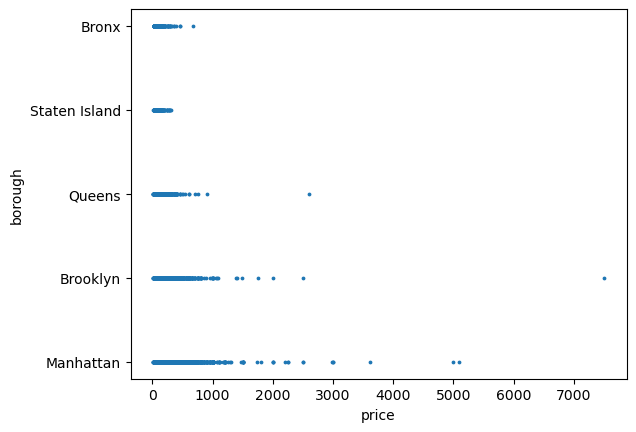

In [27]:
#It is possible to visually capture prices above normal with scatter plot.
airbnb_merged.plot.scatter(x = 'price', y = 'borough', s=3);

In [28]:
df = airbnb_merged.copy()
airbnb_merged.head()

,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review,nhood,borough
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21,Midtown,Manhattan
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05,Clinton Hill,Brooklyn
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22,Murray Hill,Manhattan
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24,Hell's Kitchen,Manhattan
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09,Chinatown,Manhattan


### 9. Price range by borough
The above output gives us a summary of prices for listings across the 5 boroughs. In this final task we would like to categorize listings based on whether they fall into specific price ranges, and view this by borough.

We can do this using percentiles and labels to create a new column, price_range, in the DataFrame. Once we have created the labels, we can then group the data and count frequencies for listings in each price range by borough.




---------------------------------------------
### Boroughs of New York City

ref: https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

In [29]:
# Create labels for the price range, label_names
label_names = ["Budget", "Average", "Expensive", "Extravagant"]

# Create the label ranges, ranges
ranges = [0, 69, 175, 350, np.inf]

# Insert new column, price_range, into DataFrame
airbnb_merged["price_range"] = pd.cut(airbnb_merged["price"], bins=ranges, labels=label_names)

# Calculate borough and price_range frequencies, prices_by_borough
prices_by_borough = airbnb_merged.groupby(["borough", "price_range"])["price_range"].count()

prices_by_borough

borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive        20
               Extravagant       0
Name: price_range, dtype: int64

## Price range of room types by districts

When we focus on the districts, we can see that the accommodation fees are similar in parallel with the real estate market.

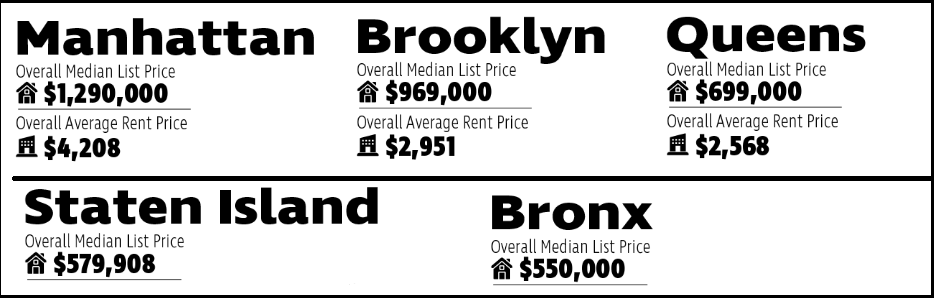


ref: https://www.yourlawyer.com/library/nyc-housing-prices-by-borough-and-neighborhood/

In [30]:
import plotly.express as px
rooms_count = airbnb_merged['room_type'].value_counts()
fig = px.bar(x= rooms_count.index, 
             y=rooms_count.values, 
             color = rooms_count.index,
             height=400,
             width = 800,
             text=rooms_count.values,
             title="Room Types")
fig.update_traces(textfont_size=15, textangle=0, textposition="outside",width = 0.3 ,cliponaxis=False)
fig.update_layout(
    xaxis_title="",
    yaxis_title="Total Number of Rooms",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### Let's analyze the distribution of districts and room types according to prices

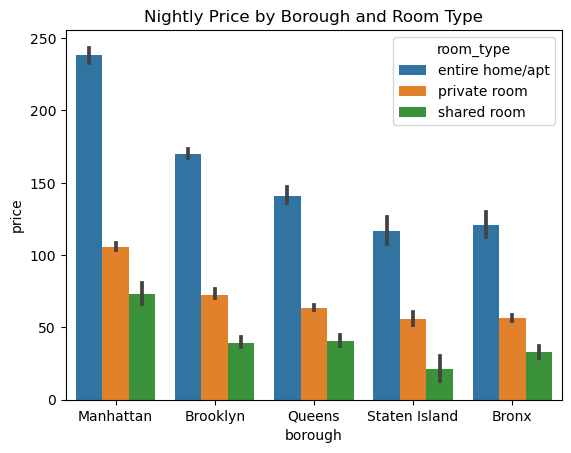

In [31]:
sns.barplot(x='borough', y='price', hue='room_type', data = airbnb_merged).set(title='Nightly Price by Borough and Room Type');

In [32]:
borough_info = airbnb_merged["borough"].value_counts()
borough_info

Brooklyn         10451
Manhattan        10315
Queens            3455
Bronx              696
Staten Island      267
Name: borough, dtype: int64

### Distribution of Airbnb rooms by boroughs

We can see from this pie chart that airbnb usage is more intense in Brooklyn and Manhattan compared to other districts. The demand for accommodation in big cities and metropolises shows itself more. It is possible to reach this information statistically. But we can easily see this situation on the data set.

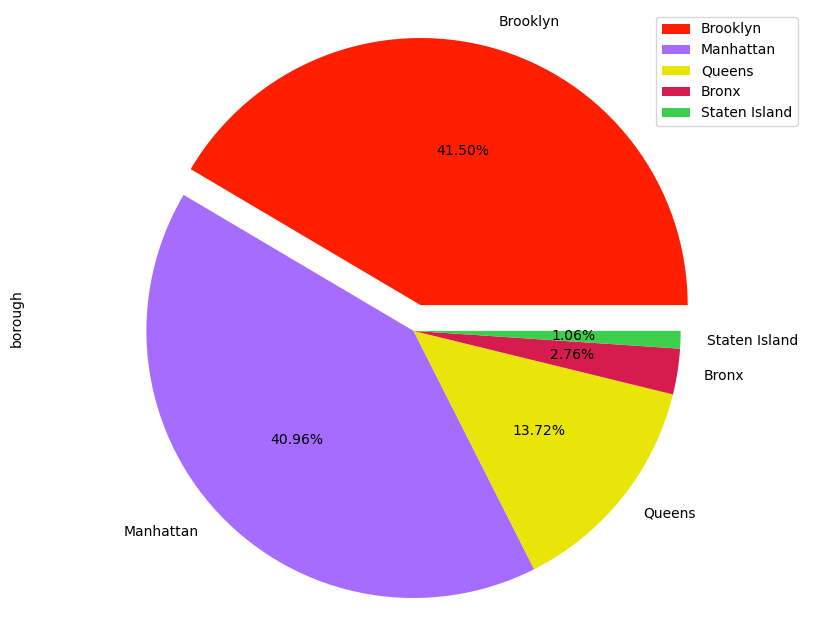

In [33]:
plt.figure(figsize = (10, 8), )
explode = (0.1, 0, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

borough_info.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = borough_info.index, loc = "best")
plt.show()

## <center></center>
### <div style="color:white;display:fill;border-radius:5px;background-color:#75B7BF;letter-spacing:0.1px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;margin:0;font-size:100%;text-align:center"> Conclusion </p>

    
#### We tried to obtain meaningful data by working on the Airbnb data set of New York City for 2019. 
    
>     We noticed that houses with the same features in different parts of the city have different accommodation prices. This shows us that a different real estate market dominates between the districts. 
    
>     In addition, accommodation fees increase in more economically active regions. As a reflection of the supply and demand balance, its effect on real estate and accommodation prices is directly observed in the data set.
    
>     When the houses in the same region are compared according to the room types, they act with a certain correlation with the fees.
    
>     Airbnb gives us an idea of how people's comfort zones and private life preferences are shaped. When we make a distribution according to the room types, it is seen that the shared room type is the least preferred. 2.32% of the room types in the data set are shared rooms. 

 LinkedIn: https://www.linkedin.com/in/hasanhuseyincosgun/
 
 Medium: https://medium.com/@hhuseyincosgun